C:\Users\Master18\AppData\Local\Temp\ipykernel_3276\2549048267.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


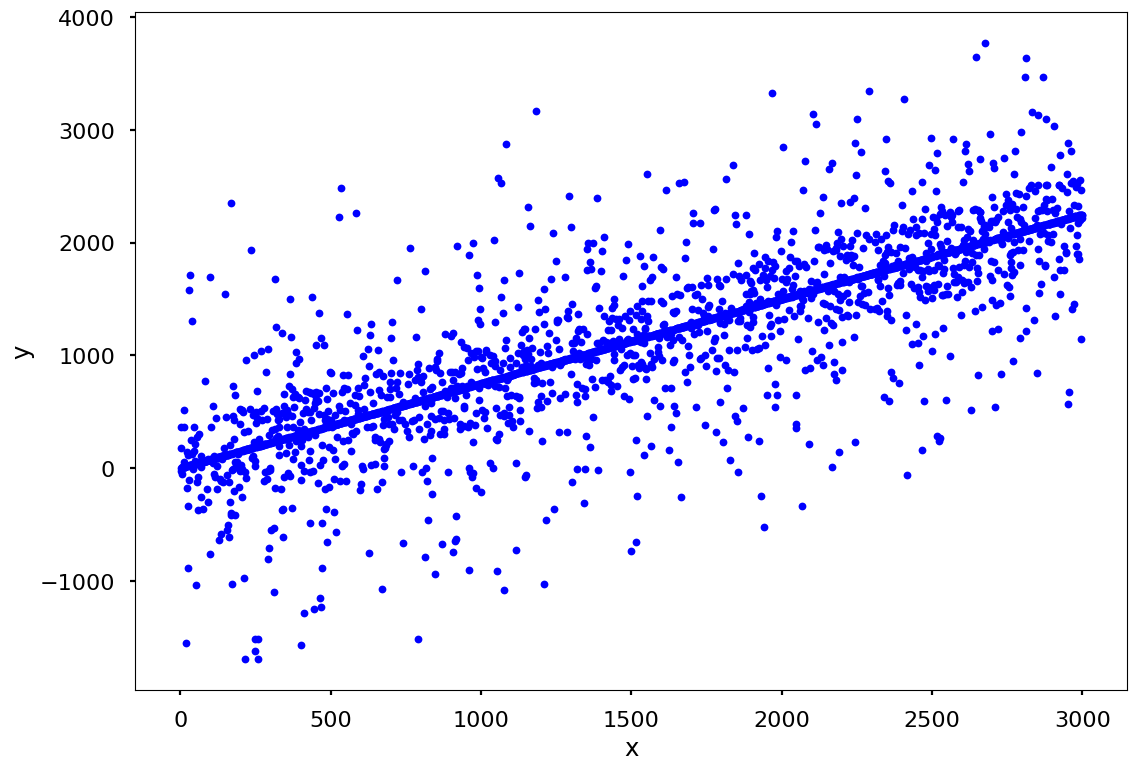

In [75]:
# Ibragimov Aydar, 11-004
## Homework 3
# Firstly generate noisy line data
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from numpy.random import randint
import random

plt.style.use('seaborn-poster')

n = 3000

random.seed(1)

x = np.linspace(1, n, n)
o = []
for i in range(n):
    o.append(random.randint(0,n))
y = []
for i in range(0, n):
    y.append( (0.75 * x[i] + (random.choice(range(int(-n/8), int(n/8))) if o[i] < n/2 else 0)
                            + (random.choice(range(int(-n/4), int(n/4))) if o[i] < n/4 else 0)
                            + (random.choice(range(int(-n/2), int(n/2))) if o[i] < n/8 else 0)
        ))

plt.plot(x, y, 'b.')
#plt.plot(x, o, 'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

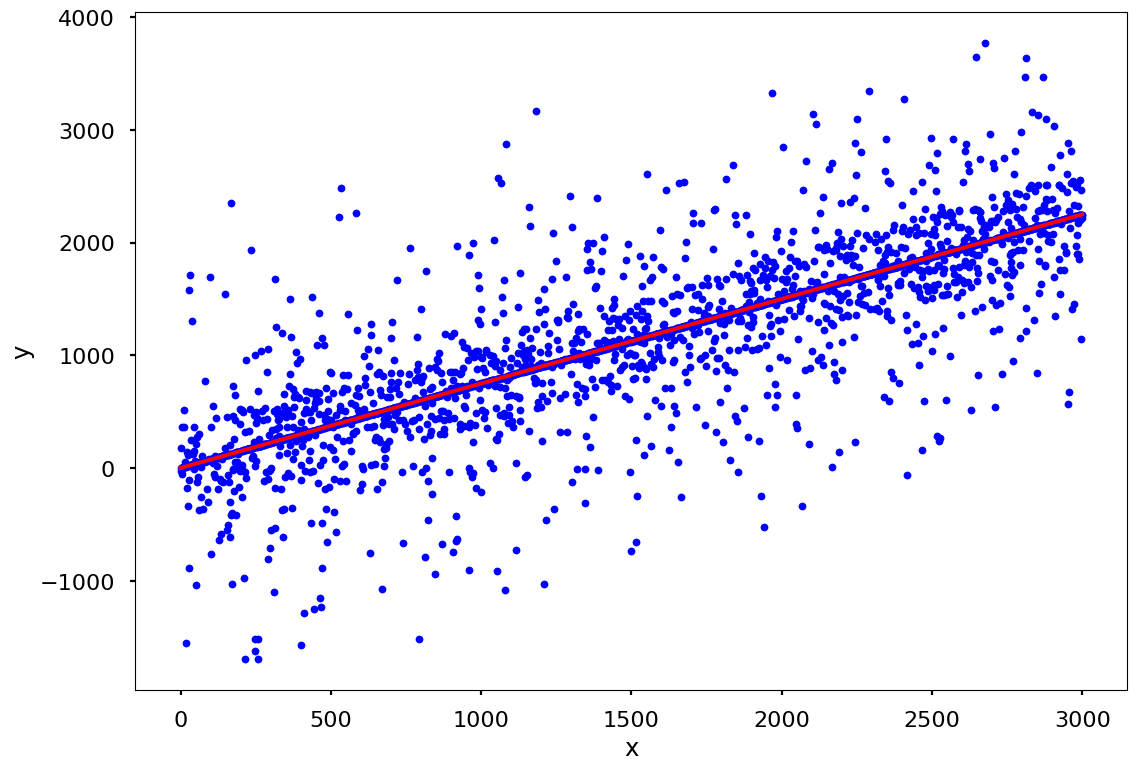

In [98]:
# Method to get coeffs kx + b by two points
## RANSAC implementation
def get_line(x1, y1, x2, y2):
    k = (y1 - y2) / (x1 - x2)
    b = y2 - k*x2
    return k, b

# mx - best number of points around target line
mx = 0

# best coeffs of target line
best_k = 0
best_b = 0

for i in range(100):
    j = random.randint(0, n-1)
    g = random.randint(0, n-1)
    
    if j==g:
        continue
    
    x1 = x[j]
    y1 = y[j]
    
    x2 = x[g]
    y2 = y[g]
    
    k, b = get_line(x1, y1, x2, y2)
    
    a = 0
    
    for h in range(n):
        # test all points, if they are around our line
        xh = x[h]
        yh = y[h]
        
        if yh <= k*xh + b + 3 and yh >= k*xh + b - 3:
            a = a + 1
        
    if a > mx:
        # there is new best coefs of line
        best_k = k
        best_b = b
        mx = a

## end of RANSAC implementation
        
plt.plot(x, y, 'b.')
plt.plot(best_k * x + best_b, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()